In [3]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [7]:
#10 particles in 15m height
init_pos=np.array([np.array([2*i,15])for i in range(10)])
init_vel=np.zeros(init_pos.shape)

In [16]:
def normalize(a):
    return a/np.linalg.norm(a)

def acceleration(index,pos,k=300,g=9.81,m=1):
    a=pos[index]
    n_1,n_2=pos[index-1],pos[index+1]
    a_grav=[0,-g]
    a_spring1=-k*(a-n_1)/m
    a_spring2=-k*(a-n_2)/m
    total_a= a_grav+a_spring1+a_spring2
    return total_a
def velocity_verlet(timestep,totaltime):
    n=int(totaltime/timestep)
    pos=np.array([np.array([2*i,15])for i in range(10)])
    vel=np.zeros(init_pos.shape)
    for i in range(n):
        oldpos=pos
        for j in range(1,len(pos)-1):
            new_pos=pos[j]+timestep*vel[j]+timestep**2*acceleration(j,pos)/2
            pos[j]=new_pos
            new_vel=vel[j]+timestep*(acceleration(j,oldpos)+acceleration(j,pos))
            vel[j]=new_vel
            
            

    x,y=pos.swapaxes(0,1)[0],pos.swapaxes(0,1)[1]
    plt.plot(x,y,ls=':',marker='o')
    plt.show()

            
        

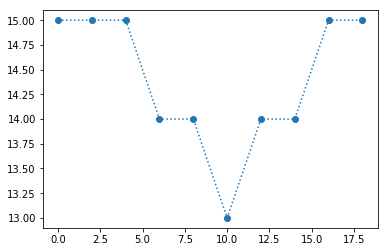

In [23]:
velocity_verlet(0.001,10)